# *Fingerprints* moleculares 

*Fingerprints* moleculares são formas de representação molecular. São vetores numéricos cujos valores indicam aspectos estruturais de uma estrutura química, como a presença de certos átomos, grupos funcionais e subestruturas. Na sua essência, os diversos tipos de *fingerprints* existentes diferem somente na forma como extraem e compactam as informações dos subgrafos de uma estrutura (as subestruturas).

# No RDKit

O RDKit tem uma variedade de funcionalidades para gerar *fingerprints* moleculares. Alguns deles existem em módulos individuais do RDKit, enquanto outros foram organizados em uma função unificada. Vamos conhecer alguns exemplos.

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem

## MACCS Keys

As MACCS (*Molecular ACCess System*) Keys são o exemplo mais simples de *fingerprint* implementado no RDKit. Consistem em um vetor de 166 *bits*, cada um representando a presença ou ausência de uma subestrutura a partir de uma lista predefinida de SMARTS. Essa lista foi desenvolvida para conter as subestruturas correspondentes aos grupos funcionais mais relevantes para a química medicinal e pode ser encontrada [aqui](https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py).

In [2]:
# Fingerprint MACCS Key
from rdkit.Chem import MACCSkeys

# Nirmatrelvir
mol = Chem.MolFromSmiles('CC1([C@@H]2[C@H]1[C@H](N(C2)C(=O)[C@H](C(C)(C)C)NC(=O)C(F)(F)F)C(=O)N[C@@H](C[C@@H]3CCNC3=O)C#N)C')

maccs = MACCSkeys.GenMACCSKeys(mol)

In [3]:
type(maccs)

rdkit.DataStructs.cDataStructs.ExplicitBitVect

In [4]:
# Este é o vetor binário de 166 bits resultantes da estrutura do Nirmatrelvir
np.array(maccs)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

## *Fingerprint* ErG

Um *fingerprint* farmacofórico que também tem um tamanho pré-definido, mas não é binário, ou seja, os valores contidos em cada posição do vetor não estão limitados a 0 e 1.

Para mais detalhes, veja o Notebook [Fingerprint ErG e scaffold hopping](https://github.com/rflameiro/Python_e_Quiminformatica/blob/main/Quiminformatica/Fingerprint%20ErG%20e%20scaffold%20hopping.ipynb).

In [5]:
# Fingerprint ErG
from rdkit.Chem import rdReducedGraphs

erg = rdReducedGraphs.GetErGFingerprint(mol)

Note que o objeto gerado é um *array* numérico do `numpy`, e não um objeto *fingerprint* específico do RDKit.

In [6]:
print(type(erg))

<class 'numpy.ndarray'>


In [7]:
erg

array([0. , 0. , 0. , 0.3, 1.3, 1.3, 0.3, 0. , 0. , 0.3, 1. , 0.3, 0. ,
       0. , 0.9, 3.6, 2.9, 1.2, 2.6, 2.9, 1.9, 1.6, 1.6, 1.6, 1.3, 0.6,
       1. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0.3, 1.3, 2.2, 3.3, 1.8, 3. , 1.2, 1.6, 2.3,
       0.9, 1. , 0.3, 0. , 0. , 1. , 0.3, 0.3, 1. , 0.3, 0. , 0. , 0. ,
       0.3, 1. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 3.3, 2.2, 1.9,
       2.3, 0.9, 1.3, 1.3, 0.6, 1. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 3.9, 4.5,
       3.8, 4.2, 3.8, 4.5, 3.9, 1.2, 1. , 0.3, 0. , 0. , 0.3, 1. , 0.3,
       0.3, 1.3, 1.3, 0.3, 0.3, 1. , 0.3, 0.3, 1. , 0.3, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

## O objeto `FingerprintGenerator`

A maneira mais direta e consistente de criar *fingerprints* de diversos tipos no RDKit é usando um objeto chamado `FingerprintGenerator`. Com ele, indicamos o **tipo** de *fingerprint* desejado, sua **forma** e os detalhes com relação a sua construção.

Os diferentes tipos de *fingerprints* apresentam parâmetros em comum, assim como parâmetros específicos. Os detalhes podem ser encontrados na [documentação do módulo rdFingerprintGenerator](https://www.rdkit.org/docs/source/rdkit.Chem.rdFingerprintGenerator.html), em inglês.

Veja abaixo um exemplo de objeto `FingerprintGenerator` para gerar um *fingerprint* Morgan. Note o uso dos parâmetros `radius` (raio, específico para *fingerprints* circulares) e `fpSize` (tamanho, comum a todos os *fingerprints* disponíveis no `FingerprintGenerator`).

In [8]:
# Exemplo de objeto FingerprintGenerator
from rdkit.Chem import rdFingerprintGenerator

fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=1024)

Com o *generator* podemos facilmente calcular um *fingerprint* a partir de um objeto RDKit Mol. Veja abaixo as opções.

### Tipos de *fingerprints* disponíveis no `FingerprintGenerator`

Em resumo, os diferentes tipos de *fingerprints* diferem na forma como as subestruturas das moléculas são encontradas e enumeradas.

- **Morgan**: um tipo de *fingerprint* circular, baseado no [ECFP (*Extended Connectivity Fingerprint*)](https://batistalab.com/classes/CHEM584/ci100050t.pdf). Em resumo, o algoritmo atribui um número a cada átomo na estrutura e atualiza esse número de acordo com seus vizinhos. Os vizinhos são os átomos ligados dentro de um raio especificado pelo usuário. O processo é repetido e novos rótulos são gerados para cada subestrutura diferente encontrada na molécula. 
    - **FCFP**: variante do *fingerprint* Morgan mais abstrata, que representa os átomos considerando farmacóforos (doador/aceptor de ligação de hidrogênio, parte de anel aromático, etc.)
- **RDKit**: "path-based", percorre "caminhos" a partir de um átomo através das ligações àquele átomo para identificar as subestruturas.
- **Atom pair**: descrito [neste artigo](https://pubs.acs.org/doi/10.1021/ci00046a002), contabiliza todos os pares de átomos presentes em uma estrutura, independente da distância entre eles. Segundo os autores, ainda que cada par individualmente não contenha informação estrutural significativa, o conjunto de todos os pares de uma estrutura química é característico para aquela estrutura.
- **Topological torsion**: descritos [neste artigo](https://pubs.acs.org/doi/abs/10.1021/ci00054a008), eles complementam os *fingerprints* AtomPair levando em conta informações de curto alcance contidas nos ângulos de torção de uma molécula. 


In [9]:
# Geradores de fingerprints disponíveis no RDKit
mfpgen = rdFingerprintGenerator.GetMorganGenerator(fpSize=1024)
fmgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=1024,
        atomInvariantsGenerator=rdFingerprintGenerator.GetMorganFeatureAtomInvGen())
rdkgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=1024)
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=1024)
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=1024)

In [10]:
# Você também pode definir objetos para o mesmo tipo de fingerprint, mas com parâmetros distintos
gen_morgan_2 = rdFingerprintGenerator.GetMorganGenerator(radius=2)
gen_morgan_3 = rdFingerprintGenerator.GetMorganGenerator(radius=3)

### As diferentes formas dos *fingerprints*

Além de existirem diferentes tipos de *fingerprints*, eles podem muitas vezes ser representados de formas diferentes. Quando usamos o `FingerprintGenerator`, as seguintes opções estão disponíveis:

- *Bit vectors*: são os vetores binários (sequência de 0s e 1s) que normalmente associamos ao conceito de *fingerprints*. São obtidos usando um método chamado *folding* que consiste em reduzir um *fingerprint* esparso ao tamanho desejado (normalmente, 1024 ou 2048 *bits*). Para gerá-los a partir de um `FingerprintGenerator` chamado `fpgen` usamos `fpgen.GetFingerprint()`.

- *Count vectors*: também são vetores *folded*, mas contêm contagens de subestruturas (por exemplo, uma molécula com 3 átomos de cloro terá o número 3 no *bit* correspondente ao átomo de cloro). Para gerá-los a partir de um `FingerprintGenerator` chamado `fpgen` usamos `fpgen.GetCountFingerprint()`.

Além disso, há também as versões *sparse*, ou seja, antes do *folding*: 

- *Bit vectors* esparsos: `fpgen.GetSparseFingerprint()` 
- *Count vectors* esparsos `fpgen.GetSparseCountFingerprint()`. 

In [11]:
mfpgen = rdFingerprintGenerator.GetMorganGenerator(fpSize=1024)

In [12]:
fp = mfpgen.GetFingerprint(mol)
fp

In [13]:
np.array(fp)

array([0, 1, 0, ..., 0, 0, 0])

Também podemos obter o *fingerprint* diretamente como um *array* numérico do `numpy`:

In [14]:
fp = mfpgen.GetFingerprintAsNumPy(mol)
fp

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [15]:
fp = mfpgen.GetCountFingerprint(mol)
fp

In [16]:
np.array(fp)

array(<rdkit.DataStructs.cDataStructs.UIntSparseIntVect object at 0x0000028452F52AA0>,
      dtype=object)

In [17]:
fp = mfpgen.GetSparseFingerprint(mol)
fp

In [18]:
fp = mfpgen.GetSparseCountFingerprint(mol)
fp

Vamos ver abaixo um exemplo mais detalhado, em que identificamos os átomos que ativam os *bits* de um *fingerprint* Morgan de raio=1 e 1024 *bits*.

Começamos mostrando como cada átomo na estrutura do nirmatrelvir é enumerado pelo RDKit.

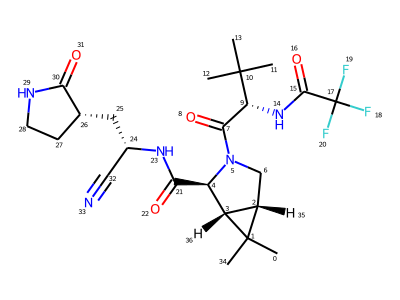

In [19]:
from rdkit.Chem import Draw

opts = Draw.MolDrawOptions()
opts.addAtomIndices = True

Draw.MolToImage(mol, size=(400,300), options=opts)

In [20]:
from rdkit.Chem import AllChem

# Esse código coleta a informação sobre como cada átomo e seus vizinhos ativa diferentes bits
mfp1gen = rdFingerprintGenerator.GetMorganGenerator(radius=1,fpSize=1024)

ao = rdFingerprintGenerator.AdditionalOutput()
# we have to ask for the information we're interested in by allocating space for it:
ao.AllocateAtomCounts()
ao.AllocateAtomToBits()
ao.AllocateBitInfoMap()

fp = mfp1gen.GetFingerprint(mol, additionalOutput=ao)

Com a função `GetBitInfoMap()` podemos mapear os *bits* e os átomos centrais que ativam esses *bits* e o raio.

In [21]:
ao.GetBitInfoMap()

{1: ((9, 0), (24, 0)),
 10: ((30, 1),),
 33: ((0, 0), (11, 0), (12, 0), (13, 0), (34, 0)),
 36: ((1, 0),),
 80: ((25, 0),),
 90: ((29, 0),),
 108: ((7, 1),),
 114: ((10, 0), (17, 0)),
 117: ((14, 1), (23, 1)),
 128: ((14, 0), (23, 0)),
 242: ((5, 1),),
 250: ((0, 1), (34, 1)),
 301: ((27, 1),),
 305: ((28, 1),),
 314: ((31, 1),),
 320: ((15, 1),),
 345: ((32, 1),),
 356: ((30, 0),),
 360: ((33, 0),),
 392: ((11, 1), (12, 1), (13, 1)),
 429: ((18, 1), (19, 1), (20, 1)),
 483: ((9, 1),),
 490: ((17, 1),),
 519: ((2, 1),),
 549: ((1, 1),),
 587: ((26, 1),),
 609: ((24, 1),),
 650: ((8, 0), (16, 0), (22, 0), (31, 0)),
 674: ((32, 0),),
 689: ((21, 1),),
 694: ((25, 1),),
 739: ((6, 1),),
 749: ((10, 1),),
 776: ((4, 1),),
 790: ((33, 1),),
 807: ((7, 0), (15, 0), (21, 0)),
 842: ((29, 1),),
 893: ((8, 1), (16, 1), (22, 1)),
 904: ((18, 0), (19, 0), (20, 0)),
 926: ((6, 0), (27, 0), (28, 0)),
 935: ((5, 0),),
 1009: ((3, 1),),
 1019: ((2, 0), (3, 0), (4, 0), (26, 0))}

Veja que o *bit* 1928 é ativado pelos átomos 18, 19 e 20 (raio=0). Olhando a imagem, vemos que esses três átomos correspondem aos átomos de flúor do grupo trifluorometila. 

Da mesma forma, todas as metilas da estrutura ativam o bit 1057. Veja, porém, que o ambiente influencia os *bits* correspondentes ao raio=1: as metilas do grupo trimetil ativam o *bit* 392, enquanto as duas metilas no ciclopropil ativam o *bit* 1274.

In [22]:
# O número de bits que cada átomo ativa:
ao.GetAtomCounts()

(2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2)

In [23]:
# Quais bits cada átomo ativa:
ao.GetAtomToBits()

((33, 250),
 (36, 549),
 (1019, 519),
 (1019, 1009),
 (1019, 776),
 (935, 242),
 (926, 739),
 (807, 108),
 (650, 893),
 (1, 483),
 (114, 749),
 (33, 392),
 (33, 392),
 (33, 392),
 (128, 117),
 (807, 320),
 (650, 893),
 (114, 490),
 (904, 429),
 (904, 429),
 (904, 429),
 (807, 689),
 (650, 893),
 (128, 117),
 (1, 609),
 (80, 694),
 (1019, 587),
 (926, 301),
 (926, 305),
 (90, 842),
 (356, 10),
 (650, 314),
 (674, 345),
 (360, 790),
 (33, 250))

## Outros geradores de *fingerprints*

No RDKit, algumas funções estão presentes em mais de um módulo. Assim, você pode encontrar algum código que use geradores de *fingerprints* diferentes do `FingerprintGenerator`. Por exemplo, é possível gerar *fingerprints* RDKit usando `Chem.RDKFingerprint()`:

In [24]:
from rdkit import Chem

fp = Chem.RDKFingerprint(mol)

type(fp)

rdkit.DataStructs.cDataStructs.ExplicitBitVect

## Cálculo de *Fingerprints* para um conjunto de estruturas químicas

Escrevi a função abaixo, que permite passar uma lista de SMILES e um gerador de *fingerprints*, e obter como saída uma lista de *fingerprints*, nos diferentes formatos disponíveis no RDKit, ou como um DataFrame do Pandas.

É preciso definir os seguintes parâmetros:

4. `output`: obter os *fingerprints* como uma lista de objetos do RDKit (output="RDKit") ou como um DataFrame, próprio para treinar modelos (output="pandas").

In [25]:
def fingerprint_df_from_smiles(smi_list, gen):
    """
    Função que calcula fingerprints moleculares a partir de uma lista de SMILES e um objeto 
    FingerprintGenerator e retorna um pandas.DataFrame (pandas)
    
    Os nomes das colunas são números de 0 até o tamanho do fingerprint menos 1
    """
    ms = [Chem.MolFromSmiles(smi) for smi in smi_list]
    fps = [gen.GetFingerprintAsNumPy(mol) for mol in ms]
    
    return pd.DataFrame(fps, columns=[str(i) for i in range(len(fps[0]))])

Importando o conjunto de dados no formato .csv e convertendo para um DataFrame do pandas

In [26]:
df = pd.read_csv("../datasets/delaney-processed.csv")
# Mostrar as 10 primeiras linhas
df.head(10)

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1
5,benzothiazole,-2.733,2,135.191,0,2,0,12.89,-1.50,c2ccc1scnc1c2
6,"2,2,4,6,6'-PCB",-6.545,1,326.437,0,2,1,0.00,-7.32,Clc1cc(Cl)c(c(Cl)c1)c2c(Cl)cccc2Cl
7,Estradiol,-4.138,1,272.388,2,4,0,40.46,-5.03,CC12CCC3C(CCc4cc(O)ccc34)C2CCC1O
8,Dieldrin,-4.533,1,380.913,0,5,0,12.53,-6.29,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl
9,Rotenone,-5.246,1,394.423,0,5,3,63.22,-4.42,COc5cc4OCC3Oc2c1CC(Oc1ccc2C(=O)C3c4cc5OC)C(C)=C


Vamos manter somente a coluna contendo os SMILES e o valor da variável resposta (*measured log solubility in mols per litre*)

In [27]:
df = df[["smiles", "measured log solubility in mols per litre"]]

# Renomeando as colunas
df.columns=["SMILES", "Solubilidade_medida"]

In [28]:
# Esse código nos permite ver todas as colunas em um DataFrame
pd.set_option('display.max_columns', None)

In [29]:
# Fingerprint Atom Pair
ap_df = fingerprint_df_from_smiles(df["SMILES"], apgen)
ap_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [30]:
# Fingerprint Feature
fcfp_df = fingerprint_df_from_smiles(df["SMILES"], fmgen)
fcfp_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [31]:
# Fingerprint Morgan
morgan_df = fingerprint_df_from_smiles(df["SMILES"], mfpgen)
morgan_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [32]:
# Fingerprint RDKit
rdkfp_df = fingerprint_df_from_smiles(df["SMILES"], rdkgen)
rdkfp_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [33]:
# Fingerprint Topological Torsion
ttfp_df = fingerprint_df_from_smiles(df["SMILES"], ttgen)
ttfp_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [34]:
# Vamos salvar o DataFrame Morgan como .csv
morgan_df.to_csv("../datasets/Delaney_Morgan.csv", sep=";", index=False)

# Algumas fontes consultadas

[FingerprintGenerator tutorial](https://greglandrum.github.io/rdkit-blog/posts/2023-01-18-fingerprint-generator-tutorial.html)

[Getting Started with the RDKit in Python](https://www.rdkit.org/docs/GettingStartedInPython.html)

https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity/6.01%3A_Molecular_Descriptors

[https://www.blopig.com/blog/2022/06/exploring-topological-fingerprints-in-rdkit/]